# HOMEWORK 12

In this homework you are going to inspect the GTSDB (German Traffic Sign Detection Benchmark) dataset. The dataset contains images of various classes of traffic signs used in Germany (and the whole EU). The objective of this homework is to go through the steps described below and to implement the necessary code.

At the end, as usual, there will be a couple of questions for you to answer. In addition, the last section of this homework is optional and, if you chose to do it, you'll earn extra point :-)

In [9]:
import os
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf

from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\Users\vlazarenko\.conda\envs\vvv2\lib\site-packages\tensorflow\pyth

### Step 0

Go to the GTSRB dataset official site ([link](https://benchmark.ini.rub.de/gtsrb_dataset.html)) to learn more about the dataset.

### Step 1
https://www.kaggle.com/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
Download the dataset ([link]()) and unzip it.

### Step 2

For this homework, you will be working with the training set. Check out the `Train.csv`, open it and see what it contains. Load the dataset and plot random samples.

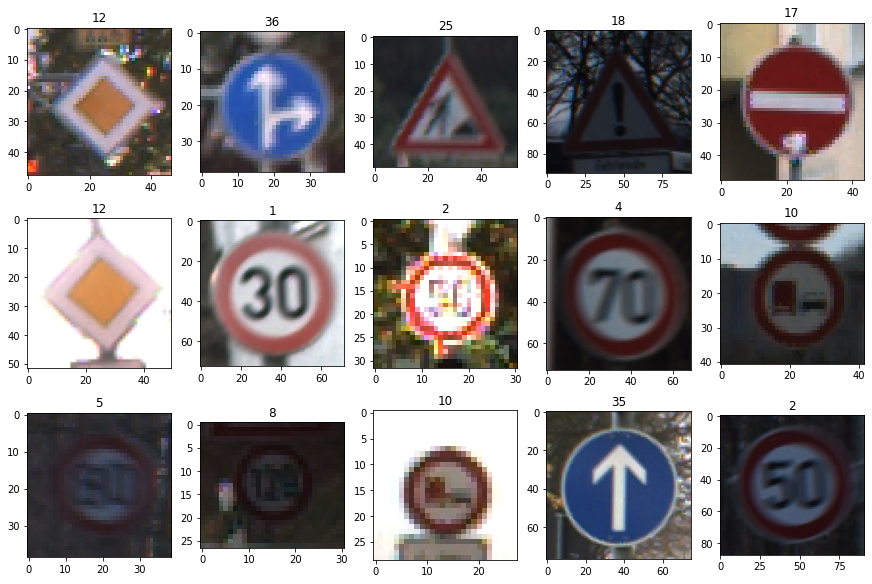

In [34]:
# Load the training labels
root = 'C:\\Users\\vlazarenko\\Desktop\\!cv\\lesson_12\\homework\\archive\\' # Path to the dataset location, e.g., '/data/janko/dataset/GTSRB'
data = pd.read_csv(os.path.join(root, 'Train.csv'))

# Number of training samples (amount of samples in data)
num_samples = len(data)

# Show random data samples
for ii in range(15):
    # Get random index
    idx = np.random.randint(0, num_samples)
    # Load image
    img = cv2.imread(os.path.join(root, data.iloc[idx]['Path']))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Convert image to RGB
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Show image
    plt.subplot(3,5,ii+1), plt.imshow(img), plt.title(data.iloc[idx]['ClassId'])

### Step 3

Inspect the dataset by computing and plotting the per-class histogram.

In [14]:


#num_classes = 42   ### ?????????????/
#centers = np.arange(0, num_classes + 1)
#counts, bounds = np.histogram(data.iloc['ClassId'], bins=centers-0.5)

#plt.bar(centers[:-1], counts), plt.grid(True)
#plt.xlabel('Class ID'), plt.ylabel('counts')


# Extract class identifiers
# Hint: Check the csv 
#ids =
ids = data.iloc[:]['ClassId']

Compute the per class histogram. You can use any approach you want (e.g. `numpy`). It's also worth looking at the `Counter` function from the `collections` module ([link](https://docs.python.org/3/library/collections.html#collections.Counter)) ;-)

39209
Width                                243
Height                               225
Roi.X1                                20
Roi.Y1                                20
Roi.X2                               223
Roi.Y2                               205
ClassId                               42
Path       Train/9/00009_00048_00029.png
dtype: object
Counter({2: 2250, 1: 2220, 13: 2160, 12: 2100, 38: 2070, 10: 2010, 4: 1980, 5: 1860, 25: 1500, 9: 1470, 7: 1440, 3: 1410, 8: 1410, 11: 1320, 18: 1200, 35: 1200, 17: 1110, 14: 780, 31: 780, 33: 689, 15: 630, 26: 600, 28: 540, 23: 510, 30: 450, 6: 420, 16: 420, 34: 420, 22: 390, 36: 390, 20: 360, 40: 360, 21: 330, 39: 300, 24: 270, 29: 270, 27: 240, 32: 240, 41: 240, 42: 240, 0: 210, 19: 210, 37: 210})


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Counts'))

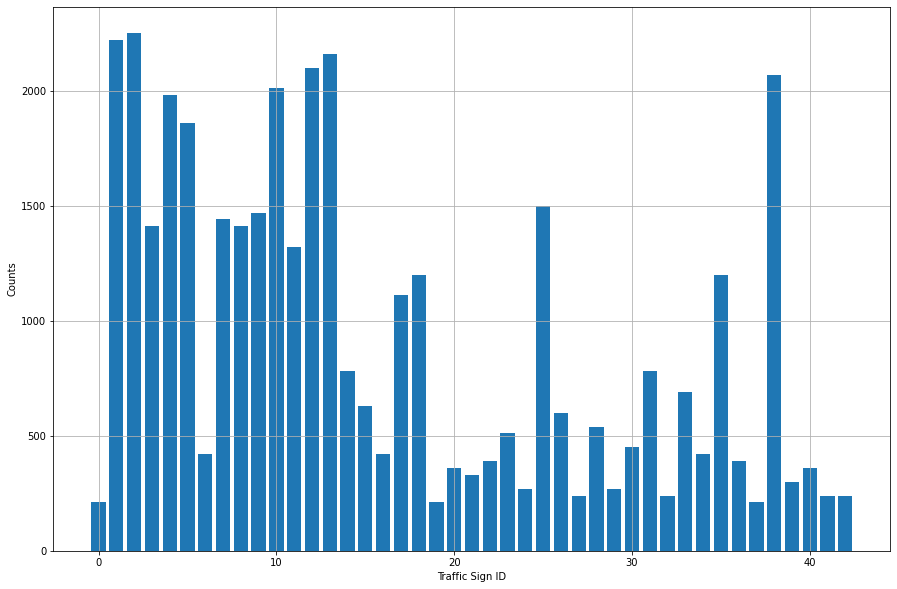

In [33]:
print(len(data))
print(np.amax(data))
amax = np.amax(ids)
from collections import Counter
hist = Counter(ids)
print(hist)
plt.bar(hist.keys(), hist.values()), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Counts')

### Questions

Please answer the following questions:
* Do you consider the dataset to be balanced? If so, why? If not, why?
 <font color='orange'>A perfectly balanced dataset would have equal % of samples of each class, as we already know fom your lection and comments to Inspection.ipynb. So, the answer is No, dataset is not balancedbar</font>
* Are there any classes that are (significantly) over-represented or under-represeneted?
<font color='orange'>I believe 8 classes (i.e. 38) are over-represented and some (i.e. 0) are under-represented</font>

### Optional

Perform a further analysis on the dataset and draw some conclusion from it.

Hint 1: Unlike MNIST or CIFAR10, this dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?
Hint 2: What about the brightness distribution? Are there classes there are significantly more bright than others?<br>
<font color='orange'>Let's first check brightness per each class:</font>

</font>

In [43]:
# Create a Numpy Array with 2 columns
arr = np.zeros(shape=(len(data), 2))

#Calculate average brightness as hsv[...,2].mean() function to an image converted to hsv 
for ii in range(len(data)):
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    arr[ii] = [hsv[...,2].mean(),data.iloc[ii]['ClassId']]


In [49]:
#save to excel for further calculations if any
np.savetxt("brightness.csv", arr, delimiter=",", header="Brightness,ClassId",fmt="%d", comments='')


[62.22649573 20.        ]


       1     classid
0    0.0  140.298660
1    1.0  123.982701
2    2.0  107.345225
3    3.0   75.458431
4    4.0   80.784611
5    5.0   68.541309
6    6.0   44.981440
7    7.0   68.104542
8    8.0   56.374118
9    9.0  107.446044
10  10.0   58.834073
11  11.0  101.417868
12  12.0  101.337168
13  13.0  112.621544
14  14.0  131.274854
15  15.0  113.628410
16  16.0  118.354839
17  17.0   96.108900
18  18.0  107.937701
19  19.0   81.239747
20  20.0   66.038208
21  21.0   97.395405
22  22.0  120.228649
23  23.0   94.962731
24  24.0   92.916359
25  25.0   96.591855
26  26.0   80.462781
27  27.0   89.724990
28  28.0  113.185895
29  29.0  101.984884
30  30.0   85.802491
31  31.0   69.433040
32  32.0   83.886114
33  33.0  102.116381
34  34.0  142.979527
35  35.0  140.571406
36  36.0  102.425055
37  37.0  116.626187
38  38.0   98.430827
39  39.0  105.339118
40  40.0  115.100390
41  41.0  102.093438
42  42.0   57.466509


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Avg Brightness'))

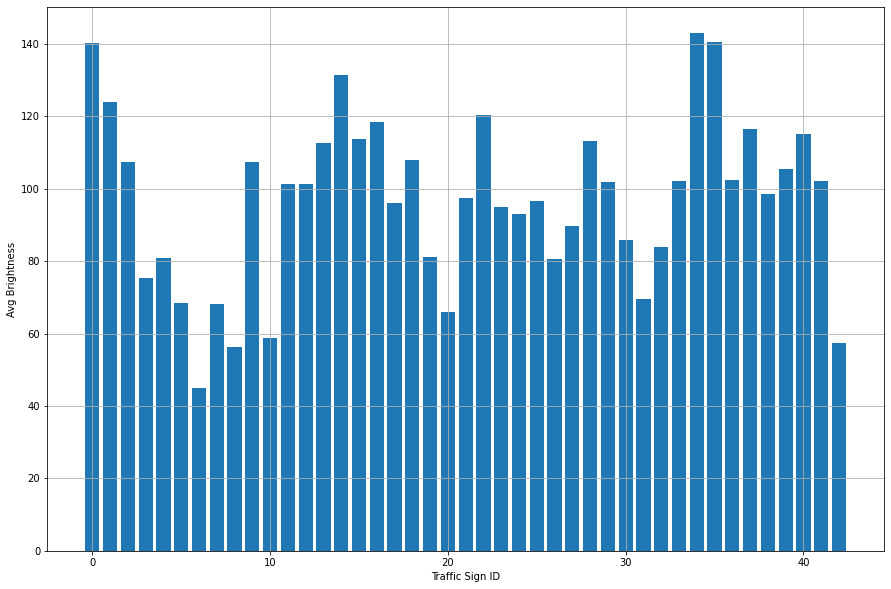

In [88]:
a= np.array(arr)

result = pd.DataFrame(a).groupby(1).agg(classid=(0,'mean')).reset_index()

print(result);
a1 = result.iloc[:,0]
a2 = result.iloc[:,1]

plt.bar(a1, a2), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Avg Brightness')

* Do you consider the brightness of the dataset to be balanced? If so, why? If not, why?
 <font color='orange'>As we can see, the brightness of the dataset is not balanced. I.e. class 6 is very dark</font>

 <font color='orange'>Now, let's check the resolution</font>

In [89]:
import math
# Create a Numpy Array with 2 columns
arr = np.zeros(shape=(len(data), 2))

#Calculate average brightness as hsv[...,2].mean() function to an image converted to hsv 
for ii in range(len(data)):
    img = cv2.imread(os.path.join(root, data.iloc[ii]['Path']))
    height, width, channels = img.shape
    diagonal = math.sqrt(height*height+width*width)
    arr[ii] = [diagonal,data.iloc[ii]['ClassId']]

       1    classid
0    0.0  75.513737
1    1.0  74.972639
2    2.0  65.261181
3    3.0  63.989913
4    4.0  65.201282
5    5.0  60.359315
6    6.0  58.381291
7    7.0  62.776159
8    8.0  61.372253
9    9.0  67.769335
10  10.0  61.020661
11  11.0  87.625502
12  12.0  76.786073
13  13.0  82.939781
14  14.0  92.585496
15  15.0  69.645954
16  16.0  76.548265
17  17.0  55.426852
18  18.0  87.184249
19  19.0  87.416525
20  20.0  64.301603
21  21.0  77.784830
22  22.0  72.679728
23  23.0  88.911683
24  24.0  83.776873
25  25.0  88.931081
26  26.0  76.823745
27  27.0  78.503130
28  28.0  82.260147
29  29.0  81.582536
30  30.0  76.384808
31  31.0  74.971473
32  32.0  58.303430
33  33.0  73.176718
34  34.0  66.953211
35  35.0  65.322873
36  36.0  64.987691
37  37.0  73.323613
38  38.0  66.079339
39  39.0  80.411990
40  40.0  80.529409
41  41.0  64.143851
42  42.0  58.300712


(Text(0.5, 0, 'Traffic Sign ID'), Text(0, 0.5, 'Avg Resolution'))

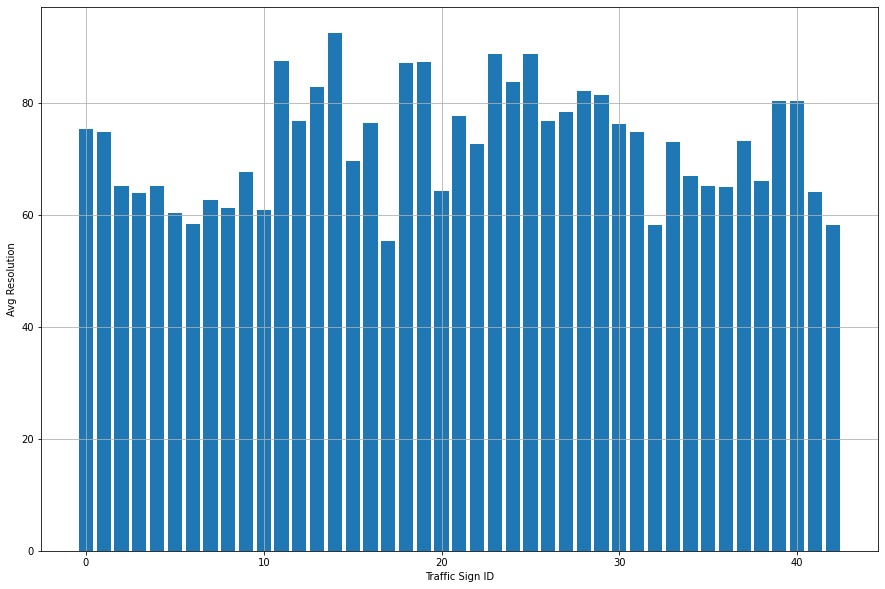

In [90]:
a= np.array(arr)

result = pd.DataFrame(a).groupby(1).agg(classid=(0,'mean')).reset_index()

print(result);
a1 = result.iloc[:,0]
a2 = result.iloc[:,1]

plt.bar(a1, a2), plt.grid(True)
plt.xlabel('Traffic Sign ID'), plt.ylabel('Avg Resolution')

* This dataset contains images with various spatial resolutions. Is there anything we can tell about the resolution distribution?<br>
<font color='orange'>Resolution distribution is better than brightness distribution, however we definitely can not say that the dataset is well balanced</font>